In [1]:
import os 
import shutil
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils.data_utils import *

In [2]:
from utils.objectCenter import df as objectCenter
objectCenter.head()

,maskPath,videoPath,objectCenter
0,../video/Videos - mask/Sphere_init4_speed1/del...,../video/Sphere_init4_speed1/delta2/0001-0150.avi,"[(0.49142350111255684, 0.7936902210237617), (0..."
1,../video/Videos - mask/Sphere_init4_speed1/del...,../video/Sphere_init4_speed1/delta1/0001-0150.avi,"[(0.49142350111255684, 0.7936902210237617), (0..."
2,../video/Videos - mask/Sphere_init4_speed1/ori...,../video/Sphere_init4_speed1/original/0001-015...,"[(0.49142350111255684, 0.7936902210237617), (0..."
3,../video/Videos - mask/Sphere_init4_speed1_per...,../video/Sphere_init4_speed1_perturbation/delt...,"[(0.49142350111255684, 0.7936902210237617), (0..."
4,../video/Videos - mask/Sphere_init4_speed1_per...,../video/Sphere_init4_speed1_perturbation/delt...,"[(0.49142350111255684, 0.7936902210237617), (0..."


In [3]:
data = openPsychoPyExperimentMetadata('../data/695811_PFE_2023-11-22_15h15.35.294.csv')
data = data.apply(buildOneHotEncoding, axis = 1)
data.head()


,videos,participant,session,init,perturbation,delta
0,../video/Sphere_init4_speed1_perturbation/delt...,695811,0,4,1,1
1,../video/Sphere_init4_speed1/original/0001-015...,695811,0,4,0,0
2,../video/Sphere_init2_speed1_perturbation/orig...,695811,0,2,1,0
3,../video/Sphere_init2_speed1_perturbation/delt...,695811,0,2,1,2
4,../video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2


In [4]:
data = data.apply(retrieveGazePosition, axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps
0,../video/Sphere_init4_speed1_perturbation/delt...,695811,0,4,1,1,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013..."
1,../video/Sphere_init4_speed1/original/0001-015...,695811,0,4,0,0,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223..."
2,../video/Sphere_init2_speed1_perturbation/orig...,695811,0,2,1,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ..."
3,../video/Sphere_init2_speed1_perturbation/delt...,695811,0,2,1,2,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230..."
4,../video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828..."


In [5]:
def filter_position(row):
    tx=row['norm_pos_x']
    ty=row['norm_pos_y']
    removed_data = 0
    for x , y in zip(tx,ty):
        if (x < 0.3 or x > 0.7) or (y < 0.5 or y > 0.9):
            print(x,y)
            removed_data +=1
            tx.remove(x)
            ty.remove(y)
    return row


# data = data.apply(filter_position,axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps
0,../video/Sphere_init4_speed1_perturbation/delt...,695811,0,4,1,1,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013..."
1,../video/Sphere_init4_speed1/original/0001-015...,695811,0,4,0,0,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223..."
2,../video/Sphere_init2_speed1_perturbation/orig...,695811,0,2,1,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ..."
3,../video/Sphere_init2_speed1_perturbation/delt...,695811,0,2,1,2,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230..."
4,../video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828..."


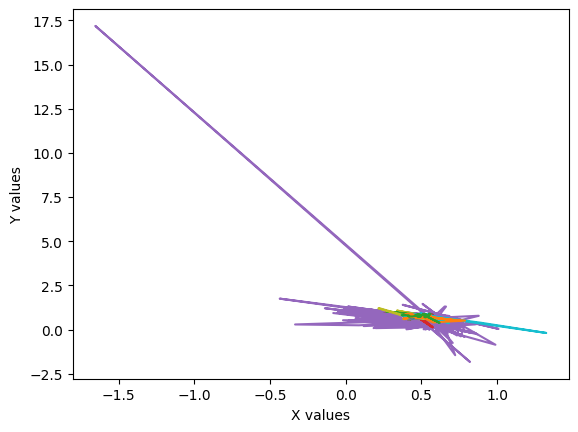

In [6]:
def createPlot(row):
    x = row.norm_pos_x
    y = row.norm_pos_y

    plt.plot(x,y)

data.apply(createPlot, axis = 1)        
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [7]:
data["fixations"] = data.apply(lambda x : get_fixations(x),axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps,fixations
0,../video/Sphere_init4_speed1_perturbation/delt...,695811,0,4,1,1,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013...","[[0.485770336066811, 0.7418393787214618, 0.507..."
1,../video/Sphere_init4_speed1/original/0001-015...,695811,0,4,0,0,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223...","[[0.45970276394800486, 0.8695652173913044, 0.2..."
2,../video/Sphere_init2_speed1_perturbation/orig...,695811,0,2,1,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ...","[[0.8244158960327149, 0.4508649545857004, 0.84..."
3,../video/Sphere_init2_speed1_perturbation/delt...,695811,0,2,1,2,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230...","[[0.09208503184042073, 0.7974331627131096, 0.3..."
4,../video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828...","[[0.3223740727938541, 0.3739648318608034, 0.08..."


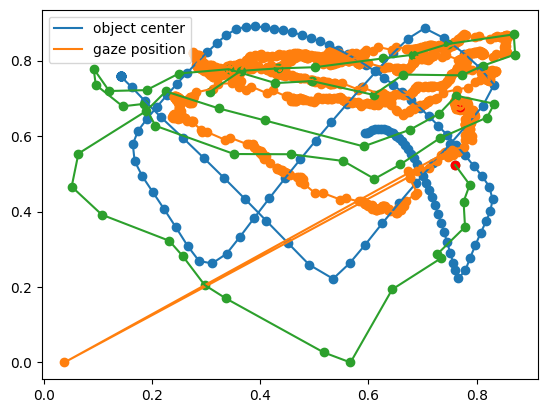

In [19]:
i = 8
df = data.iloc[i]
t = np.array(objectCenter[objectCenter['videoPath'] == df.videos]['objectCenter'].tolist())[0]
xo , yo = t[:,0] , t[:,1]
plt.scatter(xo,1-yo)
plt.plot(xo,1-yo, label = "object center")
xg , yg  = np.array(df.norm_pos_x) , np.array(df.norm_pos_y)
xmin = xg.min()
xmax = xg.max()
xg = (xg - xmin + 0.011) / ((xmax-xmin) *1.22 )

ymax = yg.min()
ymin = yg.max()
yg = (yg - ymin) / ((ymax-ymin) *1.15)
plt.scatter(xg,yg)
plt.scatter(xg[0],yg[0],color='red')
plt.plot(xg,yg , label= "gaze position")
plt.legend()
show_fixations(df)

In [9]:
data['dist'] = data.apply(lambda x : get_relative_distance_from_gravity_center(x),axis  = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y,timestamps,fixations,dist
0,../video/Sphere_init4_speed1_perturbation/delt...,695811,0,4,1,1,"[0.5097542699013797, 0.5098323131627824, 0.510...","[0.5641661403146259, 0.5640544016886735, 0.562...","[17373.902166, 17373.906131000003, 17373.91013...","[[0.485770336066811, 0.7418393787214618, 0.507...","[0.002720468122492422, 0.002720468122492422, 0..."
1,../video/Sphere_init4_speed1/original/0001-015...,695811,0,4,0,0,"[0.4988072287526015, 0.4984417047021721, 0.498...","[0.559336151676777, 0.5594607115220199, 0.5595...","[17381.51626, 17381.520253000002, 17381.524223...","[[0.45970276394800486, 0.8695652173913044, 0.2...","[0.006763220240037206, 0.006763220240037206, 0..."
2,../video/Sphere_init2_speed1_perturbation/orig...,695811,0,2,1,0,"[0.5919849394845184, 0.5914736135106153, 0.591...","[0.581293616612934, 0.5806107129933553, 0.5806...","[17269.8962685, 17269.9002985, 17269.9042945, ...","[[0.8244158960327149, 0.4508649545857004, 0.84...","[0.48300327016400757, 0.48300327016400757, 0.4..."
3,../video/Sphere_init2_speed1_perturbation/delt...,695811,0,2,1,2,"[0.4231882013165211, 0.422250561826619, 0.4218...","[0.5896247364930489, 0.5886907178621058, 0.588...","[17389.124276000002, 17389.128332, 17389.13230...","[[0.09208503184042073, 0.7974331627131096, 0.3...","[0.016344143047378308, 0.016344143047378308, 0..."
4,../video/Sphere_init4_speed1/delta2/0001-0150.avi,695811,0,4,0,2,"[0.5278836117583188, 0.5266154119991386, 0.526...","[0.5375019134066977, 0.5367230350290644, 0.536...","[17277.480345, 17277.484325999998, 17277.48828...","[[0.3223740727938541, 0.3739648318608034, 0.08...","[0.204747111522877, 0.204747111522877, 0.20474..."


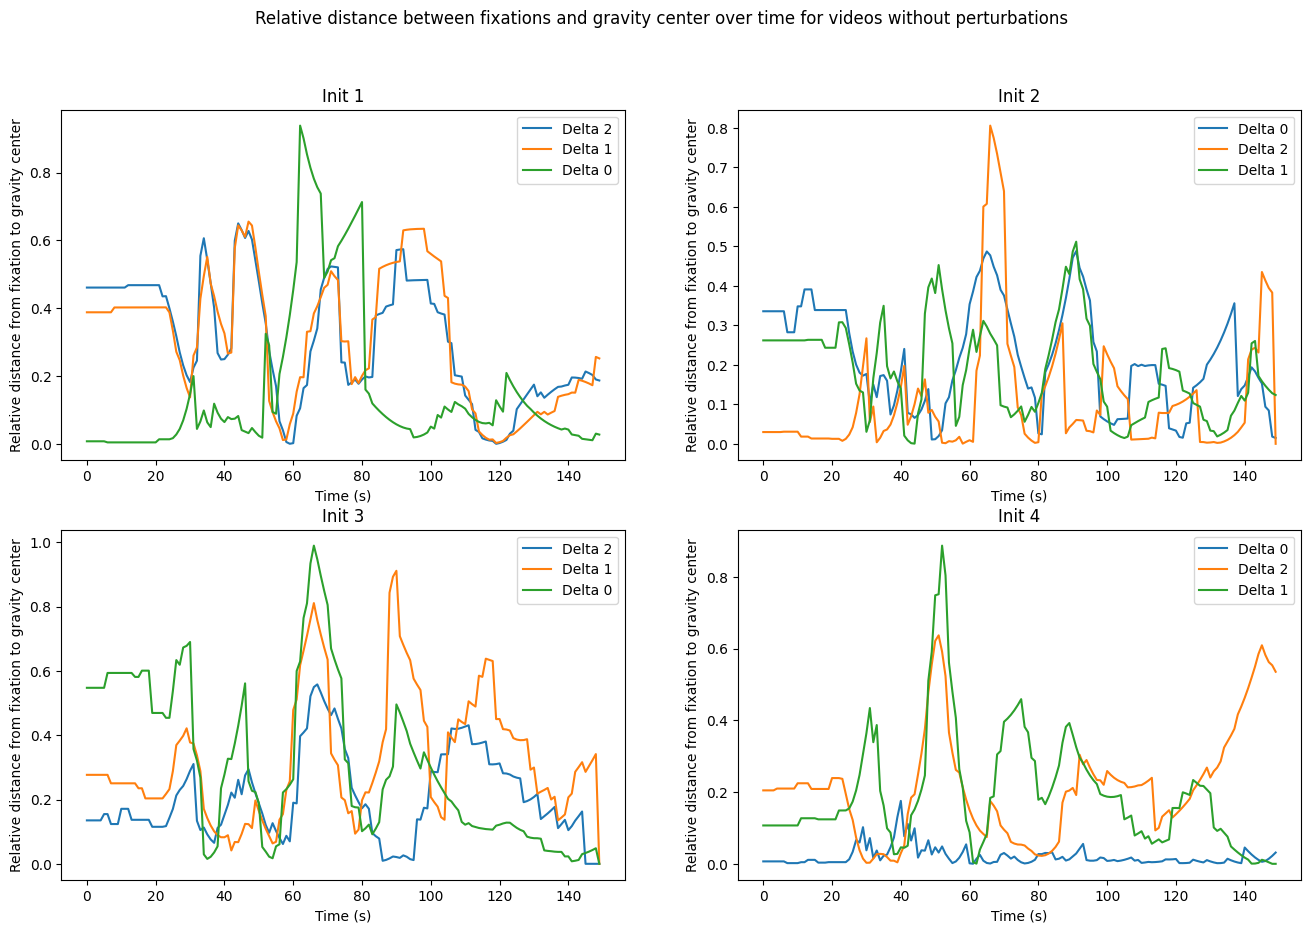

In [10]:
time = np.linspace(0,6.25,150)

fig, axs = plt.subplots(2, 2 , figsize=(16,10))
fig.suptitle('Relative distance between fixations and gravity center over time for videos without perturbations')
plt.setp(axs[:, :], xlabel='Time (s)')
plt.setp(axs[:, :], ylabel='Relative distance from fixation to gravity center')



for i in range(0,4):
    df  = data[(data['init'] == i+1) & (data['perturbation'] == 0)]
    deltas  = df.delta
    ds  = df.dist
    for d , delta in zip(ds,deltas):
        axs[i//2,i%2].plot(d , label= f'Delta {delta}')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f"Init {i+1}")

plt.show()

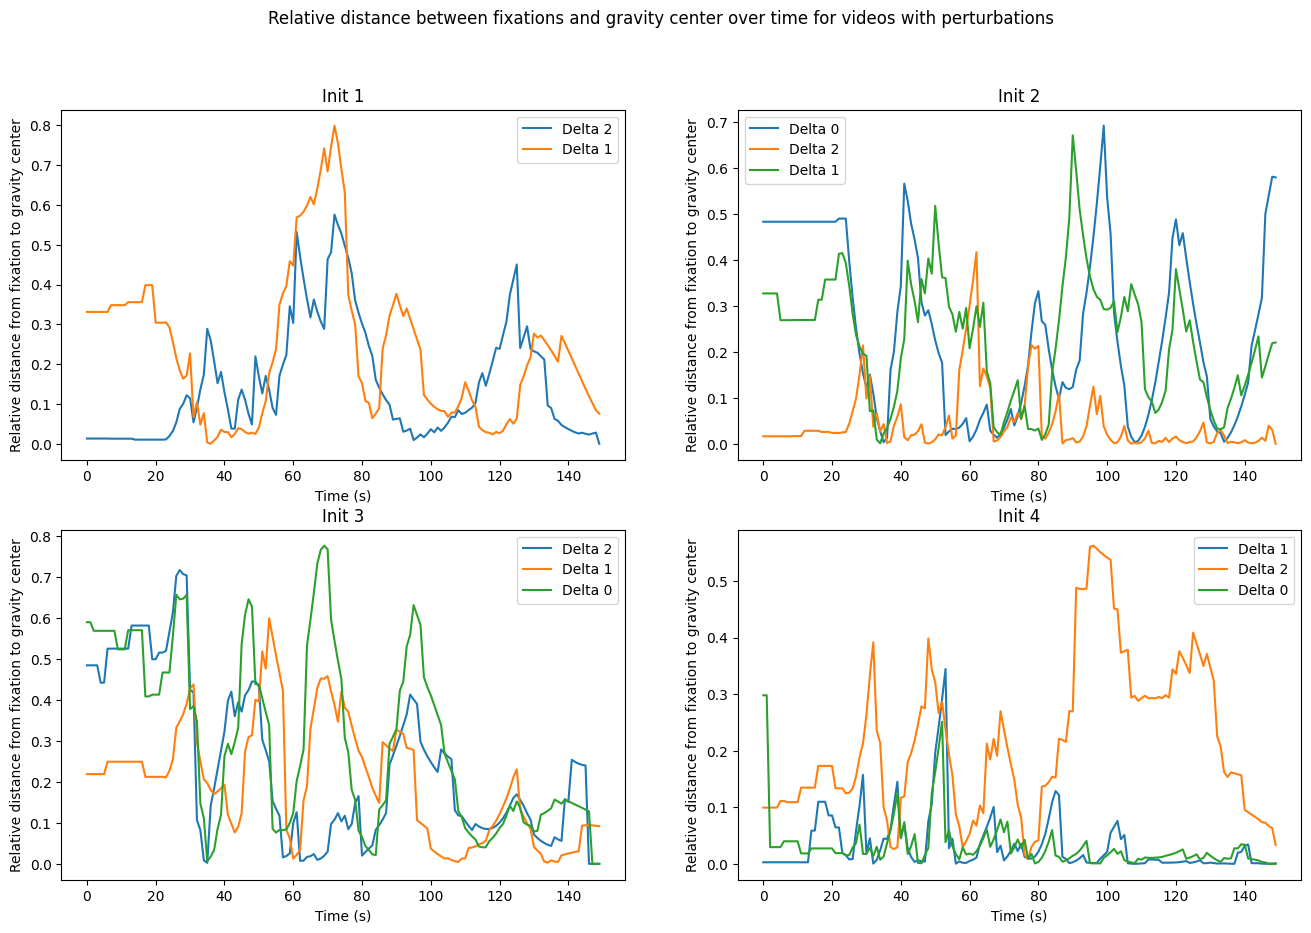

In [11]:
time = np.linspace(0,6.25,150)

fig, axs = plt.subplots(2, 2 , figsize=(16,10))
fig.suptitle('Relative distance between fixations and gravity center over time for videos with perturbations')
plt.setp(axs[:, :], xlabel='Time (s)')
plt.setp(axs[:, :], ylabel='Relative distance from fixation to gravity center')



for i in range(0,4):
    df  = data[(data['init'] == i+1) & (data['perturbation'] != 0)]
    deltas  = df.delta
    ds  = df.dist
    for d , delta in zip(ds,deltas):
        axs[i//2,i%2].plot(d , label= f'Delta {delta}')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f"Init {i+1}")

plt.show()

In [14]:
d  = data.iloc[5]
print(d.videos)
make_video(d)

../video/Sphere_init3_speed1_perturbation/delta2/0001-0150.avi
../video/Sphere_init3_speed1_perturbation/delta2/0001-0150.avi
Video processing complete. Output video saved to: ../output_video.mp4


In [13]:
#Script to copy pupil exported csv data to pupil_data folder

# Source and destination paths
rec_folder = '/Users/Quentin/recordings/2023_11_22/'
destination_root = 'pupil_data'
# Get a list of all folders in the source directory
folders_to_copy = [folder for folder in os.listdir(rec_folder) if os.path.isdir(os.path.join(rec_folder, folder))]
print(folders_to_copy)
# # Copy each folder to the destination directory with a new name to avoid conflicts
for folder in folders_to_copy:
    source_folder_path = os.path.join(rec_folder, folder)
    source_folder_path += '/exports/000'
    
    # Generate a new folder name (you can modify this logic if needed)
    destination_folder_path = os.path.join(destination_root, folder)
    
    # Copy the entire folder to the new destination
    shutil.copytree(source_folder_path, destination_folder_path)

print("Folders copied successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Quentin/recordings/2023_11_22/'